In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from nltk import wordpunct_tokenize, word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Reading in the data

Combined_Lyrics = pd.read_csv('Combined_Lyrics.csv')

In [5]:
# Creating a list of stop words, creating a lemmatizer

sw = stopwords.words('english')
wn = WordNetLemmatizer()

In [6]:
# Vectorizing lyrics data

cv = CountVectorizer(stop_words=sw, min_df=50)
X_cv = cv.fit_transform(Combined_Lyrics['Lyrics'])

In [7]:
# Converting the vectorized lyrics object to a dataframe
Vectorized_df = pd.DataFrame(X_cv.toarray(), columns = cv.get_feature_names())
# Appending on Artist and Genre
Vectorized_df = pd.concat([Vectorized_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)
# Reordering the columns
cols_to_move = ['Artist', 'Genre']
Vectorized_df = Vectorized_df[ cols_to_move + [ col for col in Vectorized_df.columns if col not in cols_to_move ] ]

In [8]:
# Tfid Vectorzing lyrics data

tf = TfidfVectorizer(max_df = 0.95, min_df = 50)
X_tf = tf.fit_transform(Combined_Lyrics['Lyrics'])

In [9]:
# Converting tfid lyrics to object to a dataframe
Tfid_df = pd.DataFrame(X_tf.toarray(), columns=tf.get_feature_names())
Tfid_df = pd.concat([Tfid_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)
# Reordering the columns
cols_to_move = ['Artist', 'Genre']
Tfid_df = Tfid_df[ cols_to_move + [ col for col in Tfid_df.columns if col not in cols_to_move ] ]

In [10]:
#split data in to x and y

y = Tfid_df['Genre']
# text = df['review'].values.astype('U')
text = Tfid_df.drop(['Genre','Artist'], axis = 1)

In [11]:
#make train and test
text_train, text_test, y_train, y_test = train_test_split(text,y, stratify = y, random_state=117, test_size=.4)

In [12]:
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# KNN

In [13]:
# Creating and fitting model, appending acuracy score to list

knn = KNeighborsClassifier()
knn.fit(text_train, y_train)
y_hat = knn.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
y_prob = knn.predict_proba(text_test)[:,1]
knn_confmatrix = confusion_matrix(y_test, y_hat)
knn_report = metrics.classification_report(y_test, y_hat)
# knn_auc = roc_auc_score(y_test, y_prob, multi_class = 'ovr')
# fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, y_prob)
model_names.append("KNN")

# SVM

In [14]:
# Creating and fitting model, appending acuracy score to list

svclassifier = SVC()  # can try 'linear' for the kernel
svclassifier.fit(text_train, y_train)  
y_hat = svclassifier.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = svclassifier.predict_proba(text_test)[:,1]
svclassifier_confmatrix = confusion_matrix(y_test, y_hat)
svclassifier_report = metrics.classification_report(y_test, y_hat)
# svclassifier_auc = roc_auc_score(y_test, y_prob)
# fpr_svclassifier, tpr_svclassifier, thresh_svclassifier = roc_curve(y_test, y_prob)
model_names.append("SVC")

# NAIVE BAYES

In [15]:
# Creating and fitting model, appending acuracy score to list

naive_bayes = GaussianNB()
naive_bayes.fit(text_train, y_train)
y_hat = naive_bayes.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
y_prob = naive_bayes.predict_proba(text_test)[:,1]
naive_bayes_confmatrix = confusion_matrix(y_test, y_hat)
naive_bayes_report = metrics.classification_report(y_test, y_hat)
# decision_tree_auc = roc_auc_score(y_test, y_prob)
# fpr_decision_tree, tpr_decision_tree, thresh_decision_tree = roc_curve(y_test, y_prob)
model_names.append("NaiveBayes")

# DECISION TREE

In [16]:
# Creating and fitting model, appending acuracy score to list

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(text_train, y_train)
y_hat = decision_tree.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = decision_tree.predict_proba(text_test)[:,1]
decision_tree_confmatrix = confusion_matrix(y_test, y_hat)
decision_tree_report = metrics.classification_report(y_test, y_hat)
# decision_tree_auc = roc_auc_score(y_test, y_prob)
# fpr_decision_tree, tpr_decision_tree, thresh_decision_tree = roc_curve(y_test, y_prob)
model_names.append("DecTree")

# LOGISTIC REGRESSION

In [17]:
# Creating and fitting model, appending acuracy score to list

logistic_regression = LogisticRegression(max_iter = 1000) 
logistic_regression.fit(text_train, y_train)
y_hat = logistic_regression.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = logistic_regression.predict_proba(text_test)[:,1]
logistic_regression_confmatrix = confusion_matrix(y_test, y_hat)
logistic_regression_report = metrics.classification_report(y_test, y_hat)
# logistic_regression_auc = roc_auc_score(y_test, y_prob)
# fpr_logistic_regression, tpr_logistic_regression, thresh_logistic_regression = roc_curve(y_test, y_prob)
model_names.append("LogReg")

# MLP

In [18]:
# Creating and fitting model, appending acuracy score to list

mlp = MLPClassifier(hidden_layer_sizes=(8,32,32), 
                    max_iter=10000, 
                    activation='tanh', 
                    verbose=False)
mlp.fit(text_train,y_train)
y_hat = mlp.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = mlp.predict_proba(text_test)[:,1]
mlp_confmatrix = confusion_matrix(y_test, y_hat)
mlp_report = metrics.classification_report(y_test, y_hat)
# mlp_auc = roc_auc_score(y_test, y_prob)
# fpr_mlp, tpr_mlp, thresh_mlp = roc_curve(y_test, y_prob)
model_names.append("MLP")

# ENSEMBLE METHODS

## RANDOM FOREST 

In [19]:
# Creating and fitting model, appending acuracy score to list

rf = RandomForestClassifier() 
rf.fit(text_train, y_train)
y_hat = rf.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = rf.predict_proba(text_test)[:,1]
rf_confmatrix = confusion_matrix(y_test, y_hat)
rf_report = metrics.classification_report(y_test, y_hat)
# rf_auc = roc_auc_score(y_test, y_prob)
# fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_prob)
model_names.append("RandForest")

## VOTING

In [20]:
# Creating and fitting model, appending acuracy score to list

vc = VotingClassifier(estimators=[('dt', decision_tree), ('lr', logistic_regression), ('knn', knn), ('svc', svclassifier), ('naive_bayes', naive_bayes), ('mlp', mlp)], voting='hard')
vc.fit(text_train, y_train)
y_hat = vc.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = vc.predict_proba(text_test)[:,1]
vc_confmatrix = confusion_matrix(y_test, y_hat)
vc_report = metrics.classification_report(y_test, y_hat)
# vc_auc = roc_auc_score(y_test, y_prob)
# fpr_vc, tpr_vc, thresh_vc = roc_curve(y_test, y_prob)
model_names.append("Voting")

## BAGGING DECISION TREE

In [21]:
# Creating and fitting model, appending acuracy score to list

clf = BaggingClassifier(base_estimator = decision_tree, n_estimators=500)
clf.fit(text_train, y_train)
y_hat = clf.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = clf.predict_proba(text_test)[:,1]
clf_confmatrix = confusion_matrix(y_test, y_hat)
clf_report = metrics.classification_report(y_test, y_hat)
# clf_auc = roc_auc_score(y_test, y_prob)
# fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, y_prob)
model_names.append("Bagging")

## ADA BOOST DECISION TREE

In [23]:
# Creating and fitting model, appending acuracy score to list

ada = AdaBoostClassifier(base_estimator = decision_tree, n_estimators=500)
ada.fit(text_train, y_train)
y_hat = ada.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = ada.predict_proba(text_test)[:,1]
ada_confmatrix = confusion_matrix(y_test, y_hat)
ada_report = metrics.classification_report(y_test, y_hat)
# ada_auc = roc_auc_score(y_test, y_prob)
# fpr_ada, tpr_ada, thresh_ada = roc_curve(y_test, y_prob)
model_names.append("AdaBoost")

# GRADIENT BOOST DECISION TREE

In [24]:
gb = GradientBoostingClassifier()
gb.fit(text_train, y_train)
y_hat = gb.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = gb.predict_proba(text_test)[:,1]
gb_confmatrix = confusion_matrix(y_test, y_hat)
gb_report = metrics.classification_report(y_test, y_hat)
# gb_auc = roc_auc_score(y_test, y_prob)
# fpr_gb, tpr_gb, thresh_gb = roc_curve(y_test, y_prob)
model_names.append("GradientBoost")

## STACKING

In [25]:
# Creating and fitting model, appending acuracy score to list

stk = StackingClassifier(estimators=[('dt', decision_tree), ('lr', logistic_regression), ('knn', knn), ('svc', svclassifier), ('naive_bayes', naive_bayes), ('mlp', mlp)], final_estimator = DecisionTreeClassifier(), n_jobs = -1, passthrough = False)
stk.fit(text_train, y_train)
y_hat = stk.predict(text_test)
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))
# y_prob = stk.predict_proba(text_test)[:,1]
stk_confmatrix = confusion_matrix(y_test, y_hat)
stk_report = metrics.classification_report(y_test, y_hat)
# stk_auc = roc_auc_score(y_test, y_prob)
# fpr_stk, tpr_stk, thresh_stk = roc_curve(y_test, y_prob)
model_names.append("Stacking")

## GRAPHING RESULTS

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

y_pos = np.arange(len(model_names))
plt.xticks(range(len(model_names)), model_names, fontsize=14)
plt.yticks([0,0.2,0.40,0.60,0.80,1.00], (0,20,40,60,80,100), fontsize=19)
colors =['r','b','k','y','m','c','o']
    
plt.rcParams['xtick.labelsize'] = 20 
barlist = plt.bar(y_pos, accuracy_scores, color=colors, align='center', alpha=0.5)

plt.ylabel('Accuracy (%)', size = 24)
plt.xlabel("Classification Algorithms", size = 23)
plt.suptitle('Accuracy of Different Classification Algorithms and Ensembles', size = 27)
A = range(len(accuracy_scores))
for xy in zip(A, accuracy_scores):                                     
    plt.annotate('%0.2f' % xy[1], xy = xy, textcoords='data') 
         
plt.show()

In [34]:
perf_df = pd.DataFrame()
perf_df['model_names'] = model_names
perf_df['accuracy_scores'] = accuracy_scores
perf_df['precision_scores'] = precision_scores
perf_df['recall_scores'] = recall_scores
perf_df = pd.melt(perf_df, id_vars=['model_names'], var_name = 'metric', value_name = 'score')
perf_df

,model_names,metric,score
0,KNN,accuracy_scores,0.444744
1,SVC,accuracy_scores,0.642293
2,NaiveBayes,accuracy_scores,0.529705
3,DecTree,accuracy_scores,0.517034
4,LogReg,accuracy_scores,0.656627
5,MLP,accuracy_scores,0.595555
6,RandForest,accuracy_scores,0.657457
7,Voting,accuracy_scores,0.659535
8,Bagging,accuracy_scores,0.633984
9,AdaBoost,accuracy_scores,0.635231


<ipython-input-36-c7137b896ced>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['KNN','SVM','NB','DT','LR','MLP','RF','Vote','BAG','ADA','GD','BOOST'])


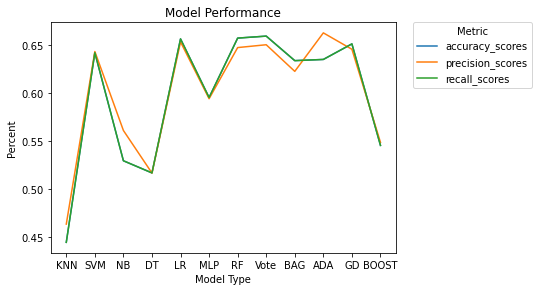

In [36]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

sns.lineplot(x = 'model_names', y = 'score', hue = 'metric', data = perf_df, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.set_xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
ax.set_xticklabels(['KNN','SVM','NB','DT','LR','MLP','RF','VOTE','BAG','ADA','GD','BOOST'])
ax.get_legend().set_title("Metric")
plt.xlabel("Model Type")
plt.ylabel("Percent")
plt.title("Model Performance")
plt.show()

In [49]:
coef_df = pd.DataFrame()
coef_df["Column_Name"] = text_train.columns

(5, 2603)

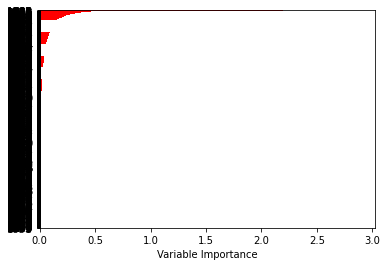

In [50]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}) #index=X_train.columns)
Importance = Importance.iloc[rf.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [62]:
Tfid_df.iloc[:,[1513,  884,  203, 1967,  120, 1330,  936, 2465,  698,  886, 2393,
             117, 1732, 1731,  776, 1057,  594, 1358,  917, 1285,  255, 1298,
            1884, 1026, 2466, 2326, 1514, 1911, 1507, 2499, 1498,  716, 2293,
             544,  939,  942,  457,  166, 2510, 1453, 2358,  719, 1541, 1198,
             938,  919, 2277, 2247, 2337, 1815]].columns
# Importance.sort_values('Importance', axis=0, ascending=False).head(50).index

Index(['nice', 'frozen', 'birthday', 'ship', 'ba', 'louder', 'gold', 'wallet',
       'electric', 'fuck', 'tryin', 'aye', 'pushing', 'pushin', 'fed', 'hip',
       'diamond', 'main', 'gimme', 'lightning', 'bounce', 'listening',
       'savior', 'heard', 'wan', 'til', 'nicki', 'section', 'nerve', 'weird',
       'neck', 'erase', 'thigh', 'daily', 'gone', 'goodbye', 'college', 'bee',
       'whip', 'mon', 'towards', 'evening', 'okay', 'kinda', 'gon', 'girl',
       'teeth', 'tag', 'toe', 'ridin'],
      dtype='object')